In [125]:
import numpy as np
from scipy.special import eval_genlaguerre, genlaguerre
from scipy.integrate import quad

N = 100
mu = 1
omega = .1 #1/100
f = mu * omega / 2

def phi(r, n):
    return np.exp( -f* np.power(r, 2) ) * \
           eval_genlaguerre(n, 0.5, 2*f*np.power(r, 2))


def V(r):
    return -0.5*mu*np.power(r*omega,2) - np.power(r,-1)


def integrand(r, i, j):
    ret = phi(r, i) * V(r) * phi(r, j) * np.power(r, 2)
    return ret

def norm(r, i, j):
    ret = phi(r, i) * phi(r, j) #* np.power(r, 2)
    return ret

In [130]:
H = np.zeros((N,N))

for i in range(H.shape[0]):
    for j in range(i, H.shape[1]):
        int_f, err = quad(integrand, 1e-4, 30, args=(i, j), limit=100)
        int_n,err_n= quad(norm, 1e-4, 30, args=(i, j), limit=100)

        H[i, j] = int_f / int_n
        H[j, i] = H[i, j]

        if i == j:
            H[i, j] += omega*(2*i + 1.5)
        
#print(H)

In [131]:
E = np.zeros(N)

for i in range(N, 0, -1):
    eigenvalues, eigenvectors = np.linalg.eig(H[:i, :i])
    E[i-1] = np.min(eigenvalues)

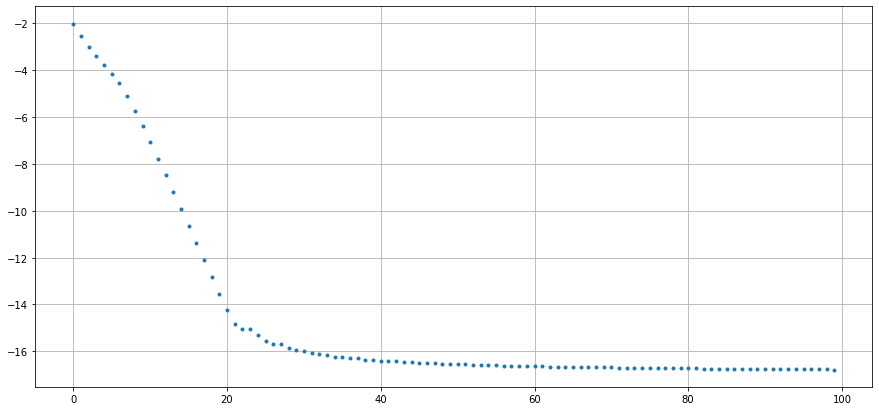

In [132]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(range(0, N), E, '.');
plt.grid();

In [129]:
H

array([[-2.00866821, -0.52233985, -0.64918824, ..., -0.09889412,
        -0.09771958, -0.0969535 ],
       [-0.52233985, -1.97861094, -0.32535216, ..., -0.12133789,
        -0.12427656, -0.12492004],
       [-0.64918824, -0.32535216, -1.73495083, ..., -0.05294417,
        -0.04449642, -0.04199626],
       ...,
       [-0.09889412, -0.12133789, -0.05294417, ..., 19.18474689,
        -0.36015111, -0.34756754],
       [-0.09771958, -0.12427656, -0.04449642, ..., -0.36015111,
        19.38745359, -0.35722985],
       [-0.0969535 , -0.12492004, -0.04199626, ..., -0.34756754,
        -0.35722985, 19.59056045]])